<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> Introduction  To Heart Disease</div>


<span style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc;; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
 In this notebook, we will explore how machine learning can assist in predicting heart disease risk based on patient data. We begin with Exploratory Data Analysis (EDA) to understand the dataset and handle any missing values. We'll perform feature engineering and label encoding to prepare the data for modeling.

To ensure the data is suitable for modeling, we will conduct statistical analysis using QQ-plots and Shapiro-Wilk tests for normality. Then, we will train and evaluate several machine learning models including SVM, Decision Trees, Random Forest, and Logistic Regression, using hyperparameter tuning to optimize performance.

Finally, we will assess the models using various evaluation metrics like accuracy, precision, recall, and ROC-AUC, aiming to provide an effective tool for early heart disease diagnosis.
</span>


<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 📝NoteBook Outlines📝</div>


<div style="font-size: 18px; font-family: Verdana; border: 2px solid #ccc; background-color: #F5F5F5; padding: 10px; border-radius: 10px; margin-bottom: 20px; position: relative;"><centre>

  <!-- Add the image inside the div, aligned to the right-center -->
 

  <span style="color: #22177A; font-weight: bold;">What’s Inside? Let’s Dive In! </span><centre>
  <ol>
    <li><a href="#1">Data Understanding</a></li>
    <li><a href="#2">Data Preprocessing </a></li>
    <li><a href="#3">Exploratory Data Analysis </a></li>
    <li><a href="#4">Statistical Analysis </a></li>
    <li><a href="#5">Feature Engineering  & Scaling</a></li>
    <li><a href="#6">Feature Importance Using Inferential Statistics</a></li>
    <li><a href="#7">Model Building </a></li>
    <li><a href="#8">Hyper  Parameter Tunning</a></li>
    <li><a href="#9">Modelling-by-Bagging</a></li>
    <li><a href="#10">Model-Evaluation </a></li>
    <li><a href="#11">Model-Submission </a></li>
    <li><a href="#12">Author's Note </a></li>
  </ol>
</div>


<a id="1"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Data Understanding🧩</div>


<a id="1.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Import Necessary Libraries</div>


In [1]:
import os
dataset_path = '/kaggle/input/'
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/heart_disease_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler , MinMaxScaler

<a id="1.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Read And Understand Dataset</div>


In [3]:
df = pd.read_csv('/kaggle/input/heart_disease_data.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(f'The Shape of dataset is {df.shape}')

The Shape of dataset is (918, 12)


In [6]:
df.columns.tolist()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<a id="2"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Data Preprocessing🧩</div>


<a id="2.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Split categorical and numerical data</div>


In [8]:
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [9]:
numerical_data= numerical_data.drop(['HeartDisease'], axis=1)
numerical_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [10]:
print(categorical_data.describe())

        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460


In [11]:
print(numerical_data.describe().T)

             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2


<a id="2.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Unique Values</div>


In [12]:
def unique_values(df):
  df_unique_values = df.apply(lambda col: col.nunique())
  df_cnt = pd.DataFrame(df_unique_values, columns=['unique_values'])
  return df_cnt

unique_values(df)

,unique_values
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


<a id="2.3"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Handling Missing and Duplicate Values</div>


In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.dropna(axis=0 , inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(918, 12)

<a id="3"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);">🧩ExploratoryData Analysis (EDA)🧩</div>


<a id="3.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Target Variable Analysis</div>


In [16]:
target_cnt= df['HeartDisease'].value_counts().reset_index()
target_cnt.columns = ['HeartDisease', 'Count']
target_cnt.sort_values(by='HeartDisease', inplace=True)
target_cnt["Percentage"] =(round((target_cnt["Count"] / target_cnt["Count"].sum()) * 100))

target_cnt

,HeartDisease,Count,Percentage
1,0,410,45.0
0,1,508,55.0


In [17]:
# Shows the Distribution of Heat Diseases with respect to male and female

fig=px.bar(target_cnt,
                 x="HeartDisease",
                 y= 'Count',
                 text = 'Percentage',
                 color="HeartDisease",
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()


fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

<a id="3.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Univariate Analysis</div>


In [18]:
def plot_hist(col):
  fig=px.histogram(df,
                 x=col,
                #  color="HeartDisease",
                 hover_data=df.columns,
                 title=f"Distribution of {col} ",
                 barmode="group")
  fig.show()

In [19]:
def plot_bar(col):
    val_cnt = df[col].value_counts().reset_index()
    val_cnt.columns = [col, 'Count']
    val_cnt["Percentage"] =(round((val_cnt["Count"] / val_cnt["Count"].sum()) * 100))

    fig=px.bar(val_cnt,
                 x=col,
                 y= 'Count',
                 text = 'Percentage',
                 color=col,
                 title=f"Distribution of {col} Diseases",
                 barmode="group")
    fig.show()

In [20]:
for i in categorical_data.columns:
  plot_hist(i)

In [21]:
for i in numerical_data.columns:
  plot_bar(i)

In [22]:
for i  in categorical_data.columns:
  plot_bar(i)

In [23]:
def plot_hist(col):
  fig=px.histogram(df,
                 x=col,
                 color="HeartDisease",
                 hover_data=df.columns,
                 title=f"Distribution of {col} Diseases",
                 barmode="group")
  fig.show()

In [24]:
for i  in categorical_data.columns:
  plot_hist(i)

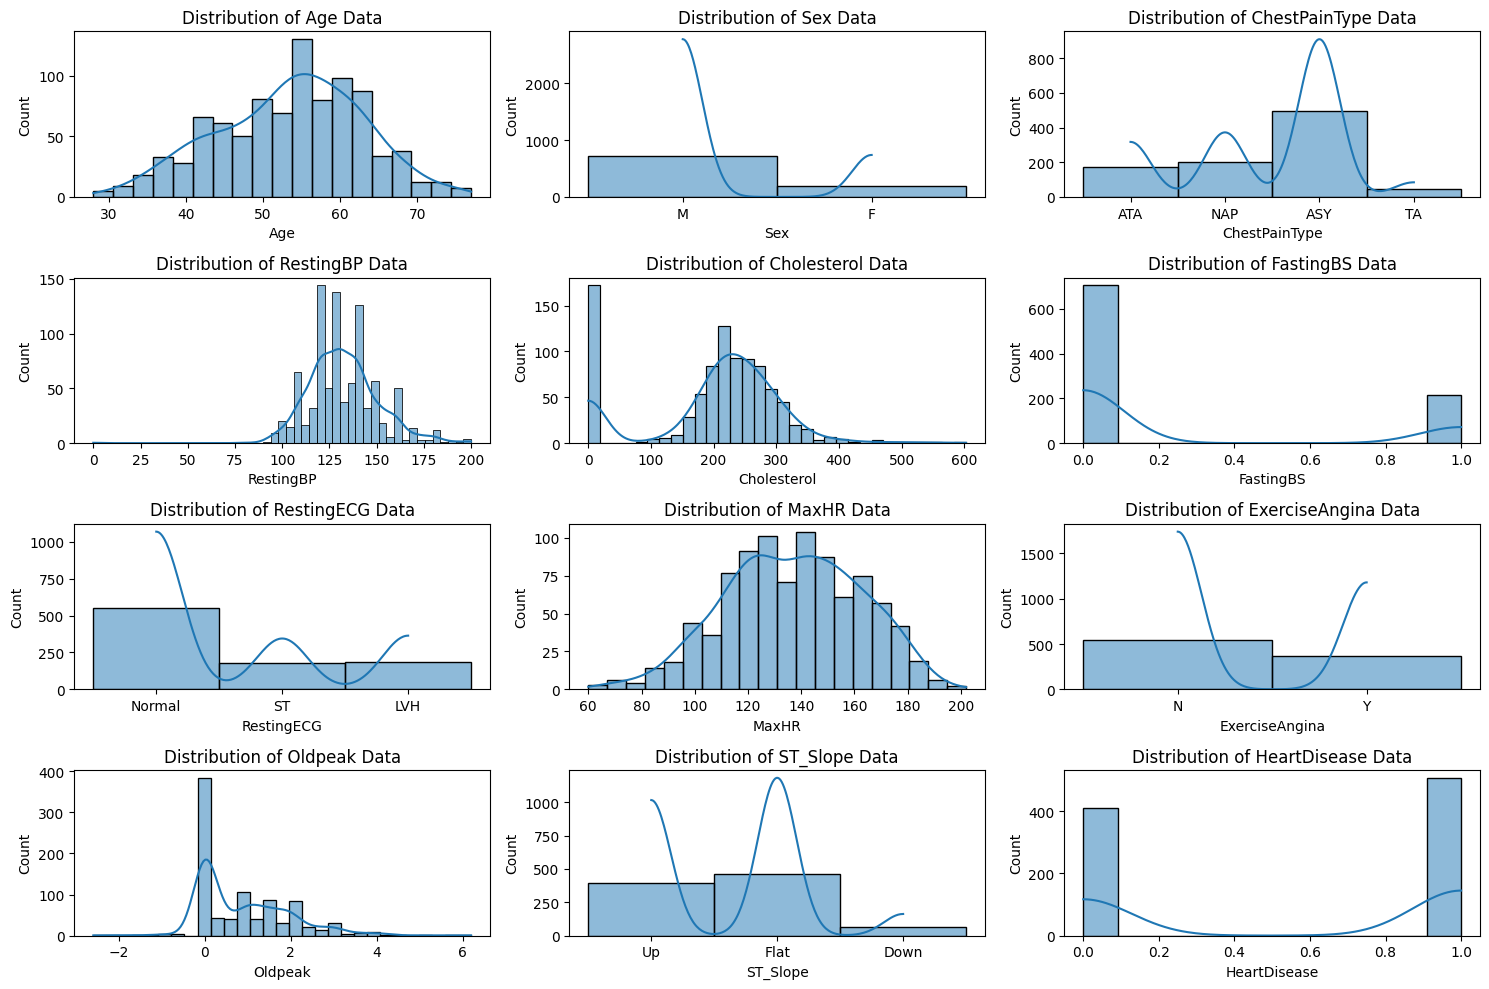

In [25]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True )
    plt.savefig('Variables distribution.png', dpi=300, bbox_inches='tight')  # Save as PNG

    plt.tight_layout()
    plt.plot()

<a id="observations"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Key Observations
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px;">
    <li><b>Age:</b> The distribution is roughly normal, with the majority of individuals aged between <b>40 and 60 years</b>.</li>
    <li><b>Sex:</b> The dataset contains more <b>males (M)</b> than <b>females (F)</b>.</li>
    <li><b>Chest Pain Type (ChestPainType):</b> Among the categories (<b>ATA, NAP, ASY, TA</b>), the "<b>ASY</b>" category appears most common, indicating many individuals may experience atypical symptoms.</li>
    <li><b>Resting Blood Pressure (RestingBP):</b> The values center around <b>120 mmHg</b>, with a slight skew toward higher readings.</li>
    <li><b>Cholesterol:</b> The data follows a near-normal distribution, with most values between <b>150 and 300 mg/dL</b>, suggesting varying cholesterol levels across the population.</li>
    <li><b>Fasting Blood Sugar (FastingBS):</b> Most people in the dataset have a fasting blood sugar below <b>1</b>, indicating fasting blood sugar is generally within the normal range.</li>
    <li><b>Resting ECG:</b> The majority fall into the "<b>Normal</b>" category, with fewer cases in "<b>ST</b>" or "<b>LVH</b>" categories.</li>
    <li><b>Max Heart Rate Achieved (MaxHR):</b> The distribution peaks around <b>140-160 beats per minute</b>, indicating typical heart rate limits during exertion.</li>
    <li><b>Exercise-Induced Angina (ExerciseAngina):</b> Most individuals do not experience exercise-induced angina, as indicated by the dominance of the "<b>N</b>" category.</li>
    <li><b>Oldpeak (ST Depression):</b> Most values are close to <b>zero</b>, suggesting relatively normal exercise ECG results for many participants.</li>
    <li><b>ST Slope:</b> "<b>Flat</b>" is the most common slope type, followed by "<b>Up</b>," indicating variability in ECG patterns.</li>
    <li><b>Heart Disease:</b> The target variable shows a <b>bimodal distribution</b>, indicating both the presence and absence of heart disease cases.</li>
</ul>
</div>


<a id="3.3"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Pair-Plot</div>


[]

<Figure size 1500x1000 with 0 Axes>

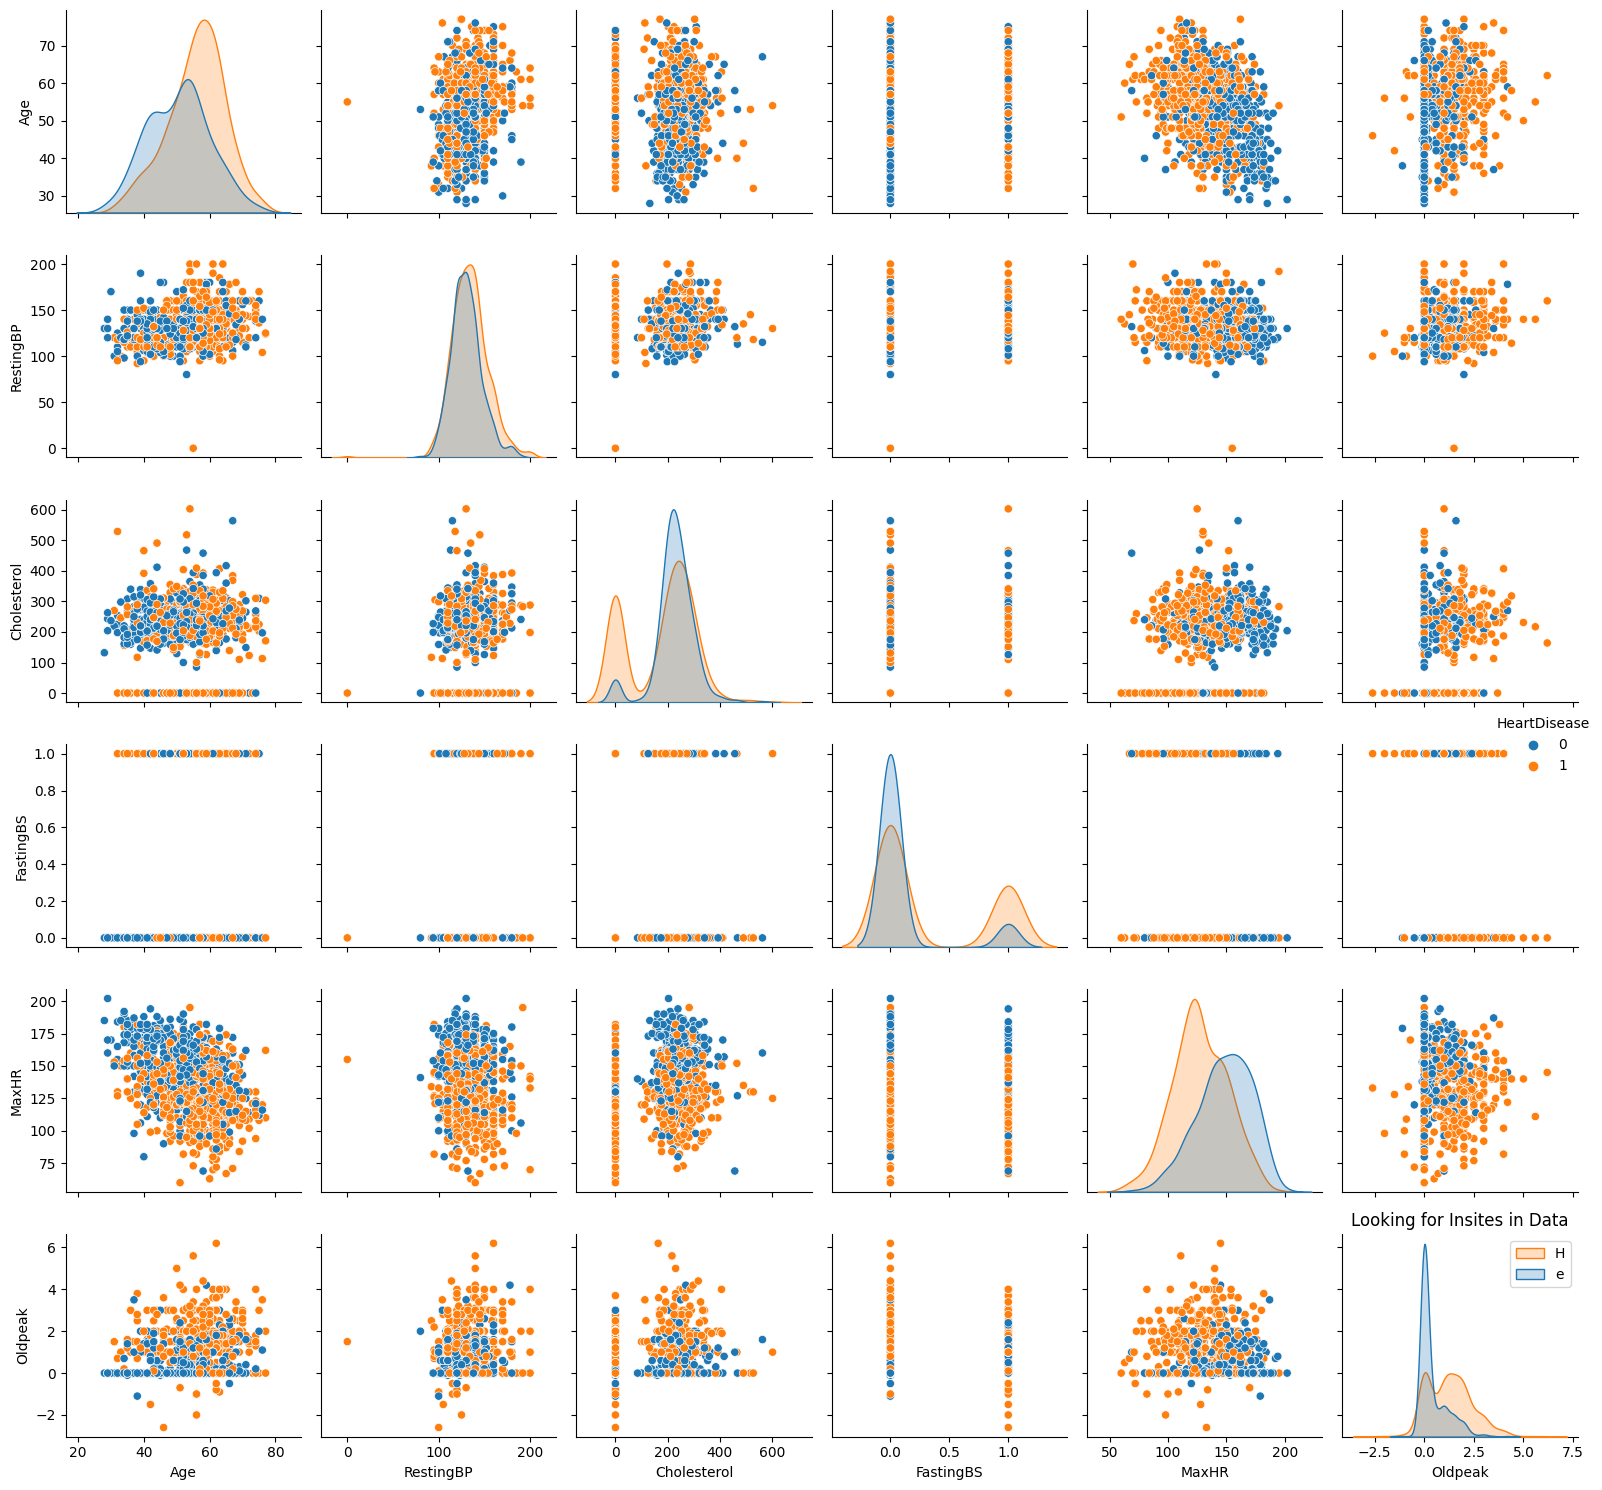

In [26]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.savefig('Looking Insights.png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.tight_layout()
plt.plot()

<a id="insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Key Insights
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px;">
    <li><b>Age:</b> People with heart disease (orange points) tend to cluster in older age groups, whereas those without heart disease (blue points) are more evenly distributed across the age range.</li>
    <li><b>RestingBP (Resting Blood Pressure):</b> No strong visible pattern differentiates heart disease and non-heart disease groups based on RestingBP, suggesting it might not be a strong independent predictor.</li>
    <li><b>Cholesterol:</b> Cholesterol values span a wide range for both groups, but heart disease patients exhibit slightly higher cholesterol levels on average.</li>
    <li><b>FastingBS (Fasting Blood Sugar):</b> FastingBS is binary (0 or 1). A higher proportion of individuals with heart disease have elevated fasting blood sugar levels (value of 1).</li>
    <li><b>MaxHR (Maximum Heart Rate Achieved):</b> A clear distinction is observed here: those without heart disease tend to achieve higher maximum heart rates compared to those with heart disease, making this a potentially strong predictive feature.</li>
    <li><b>Oldpeak:</b> Oldpeak (likely ST depression) is visibly higher for individuals with heart disease, as indicated by the clustering of orange points in the higher range.</li>
</ul>

<h4 style="color: #333;">Overall Relationships:</h4>
<p>The scatter plots reveal correlations between some variables. For example, <b>Age</b> and <b>MaxHR</b> show a negative trend for both groups, with older individuals generally achieving lower max heart rates. <b>Cholesterol</b> and <b>RestingBP</b> do not show any obvious relationships with other variables.</p>

<h4 style="color: #333;">Predictive Variables:</h4>
<p><b>MaxHR</b>, <b>Age</b>, <b>Oldpeak</b>, and <b>FastingBS</b> appear to have the most significant separation between individuals with and without heart disease, suggesting they could be strong predictors in a classification model.</p>
</div>


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots # Import the make_subplots function

In [28]:
num_features = numerical_data.columns.tolist()
num_plots = len(num_features)

n_cols = 2  
n_rows = (num_plots + n_cols - 1) // n_cols 
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"Distribution of {col}" for col in num_features])

for idx, feature in enumerate(num_features):
    row = idx // n_cols + 1
    col = idx % n_cols + 1

    box_plot = go.Box(
        y=df[feature],
        x=df["HeartDisease"],
        name=feature,
        marker_color="blue",
        boxmean=True  
    )
    fig.add_trace(box_plot, row=row, col=col)

fig.update_layout(
    height=300 * n_rows,  
    width=1000,           
    title_text="Box Plots of Numerical Features by HeartDisease",
    showlegend=False     
)

fig.show()

<a id="box-plot-insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Insights from the Box Plots of Numerical Features by Heart Disease
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px;">
    <li><b>Age:</b> Patients with heart disease (label 1) tend to have a slightly higher median age compared to those without heart disease (label 0). However, there is significant overlap, indicating that age alone might not be a strong predictor.</li>
    <li><b>RestingBP (Resting Blood Pressure):</b> The distribution of resting blood pressure is fairly similar for both groups. Both groups exhibit some outliers, suggesting that resting blood pressure might not differentiate strongly between heart disease and non-heart disease cases.</li>
    <li><b>Cholesterol:</b> Patients without heart disease (label 0) show a wider range of cholesterol values, while patients with heart disease (label 1) tend to cluster at slightly lower values. Outliers are present in both groups.</li>
    <li><b>FastingBS (Fasting Blood Sugar):</b> Fasting blood sugar values appear to vary significantly between the groups. A notable concentration of patients with heart disease (label 1) have higher fasting blood sugar levels, suggesting this could be a potential predictor.</li>
    <li><b>MaxHR (Maximum Heart Rate):</b> Patients with heart disease (label 1) tend to have lower maximum heart rates compared to those without heart disease (label 0). This variable seems to show a clearer distinction between the two groups.</li>
    <li><b>Oldpeak:</b> Oldpeak values (ST depression induced by exercise relative to rest) are higher in patients with heart disease. This variable shows a strong separation between the two groups, indicating it could be a strong predictor for heart disease.</li>
</ul>

</div>


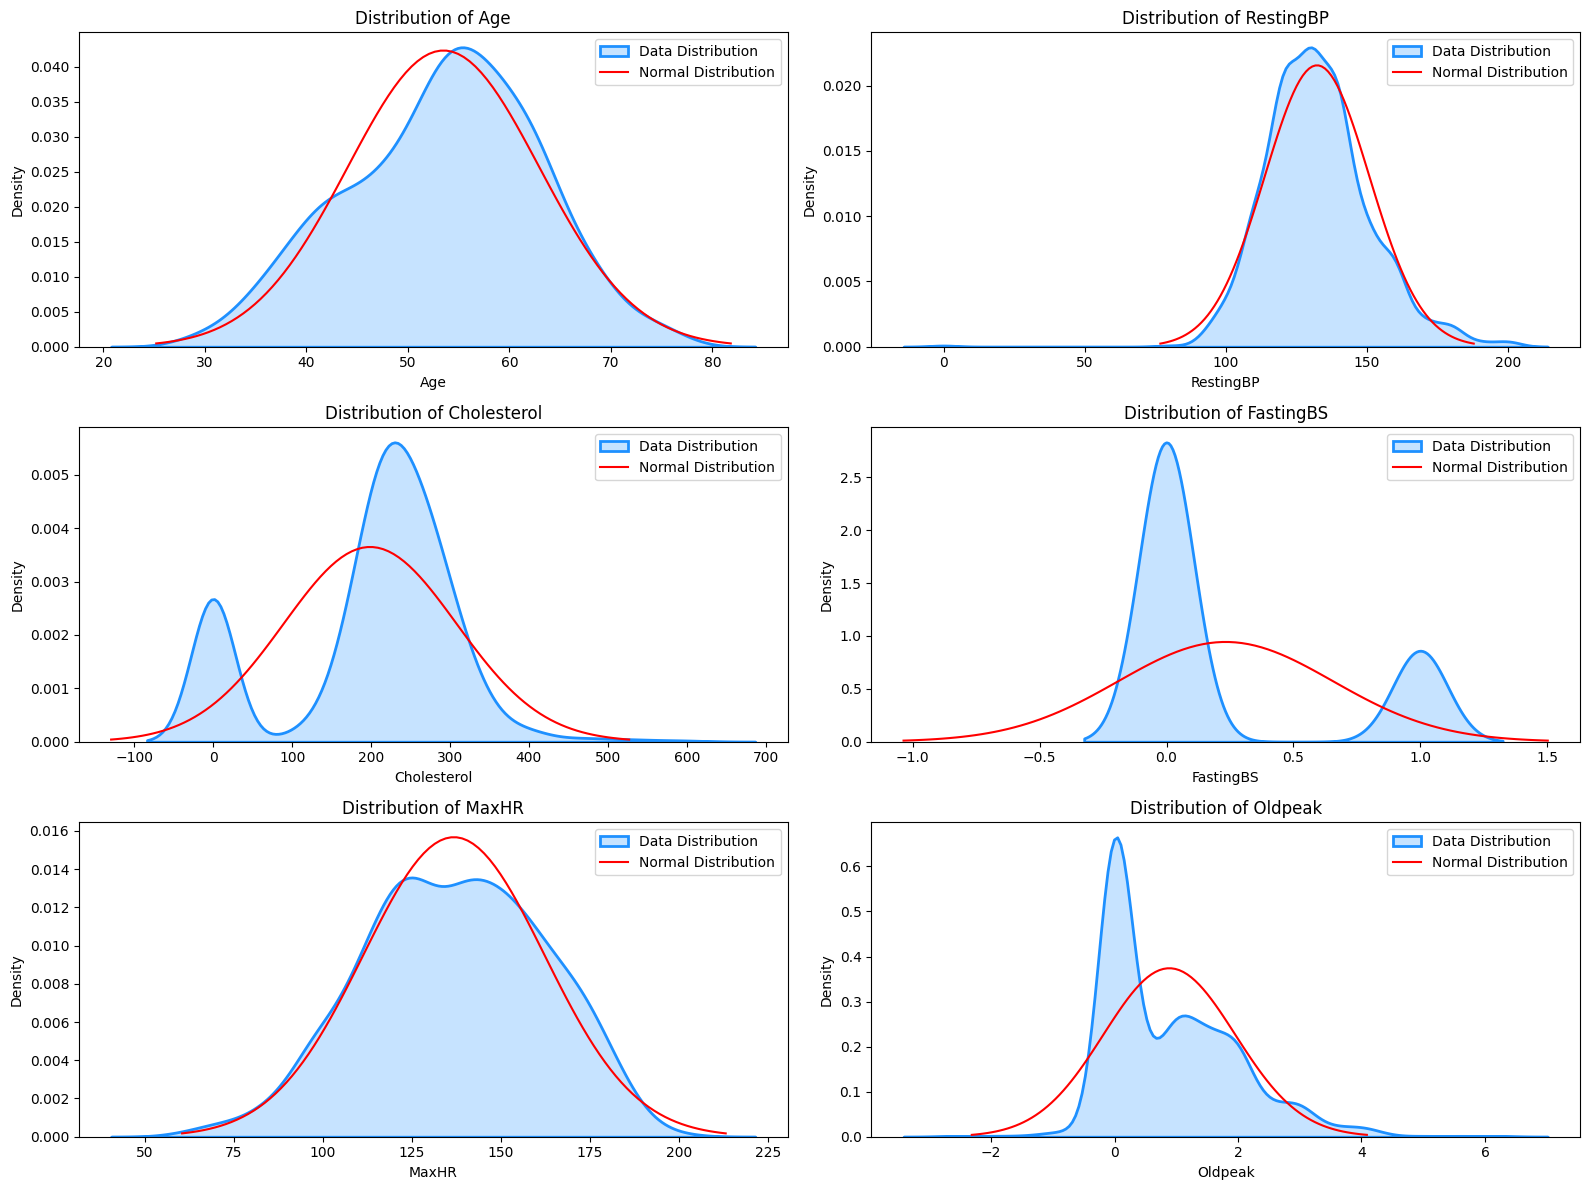

In [29]:

num_features = len(numerical_data.columns)
cols = 2  
rows = (num_features + cols - 1) // cols  
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))  # Create the subplot grid
axes = axes.flatten() 
for i, feature in enumerate(numerical_data.columns):
    sns.kdeplot(
        data=df,
        x=feature,
        color='dodgerblue',
        fill=True,
        label="Data Distribution",
        shade=True,
        linewidth=2,
        ax=axes[i]
    )

    mean = df[feature].mean()
    std = df[feature].std()

    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = stats.norm.pdf(x, mean, std)

    axes[i].plot(x, y, color="red", label="Normal Distribution")

    axes[i].set_title(f"Distribution of {feature}")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('Features Vs Noraml Distributions', dpi=300, bbox_inches='tight')  # Save as PNG

plt.show()

<a id="feature-insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Feature Distributions and Insights
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px;">
    <li><b>Age:</b> The distribution closely follows a normal curve, suggesting minimal preprocessing may be required. This feature could work well as a continuous variable in most models.</li>
    <li><b>RestingBP (Resting Blood Pressure):</b> Slight deviation from normality, with a minor skew to the right.</li>
    <li><b>Cholesterol:</b> The distribution is unimodal and approximately normal, but with some noticeable tails.</li>
    <li><b>FastingBS (Fasting Blood Sugar):</b> This appears to be a discrete feature, primarily clustering at 0 and 1 (binary). It should likely be treated as a categorical variable instead of continuous.</li>
    <li><b>MaxHR (Maximum Heart Rate):</b> This feature also resembles a normal distribution, with a slight skew to the left. It is well-suited for models that assume normality, but further normalization could improve symmetry.</li>
    <li><b>Oldpeak:</b> Highly skewed, with most values concentrated around 0. This feature may benefit from transformations (e.g., log or Box-Cox) to reduce skewness and make the distribution more symmetrical.</li>
</ul>

</div>


<a id="4"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Statistical Analysis🧩</div>


<a id="4.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">QQ-Plot</div>


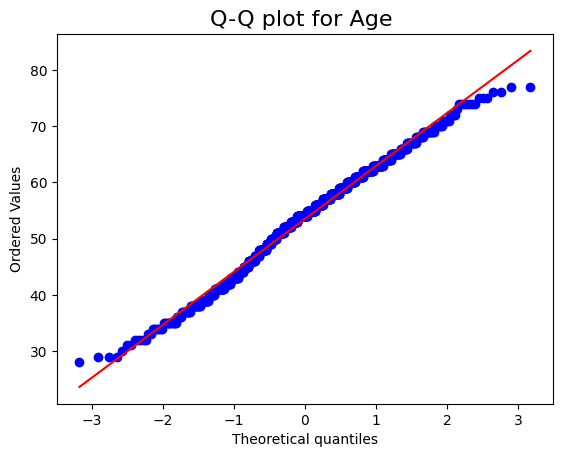

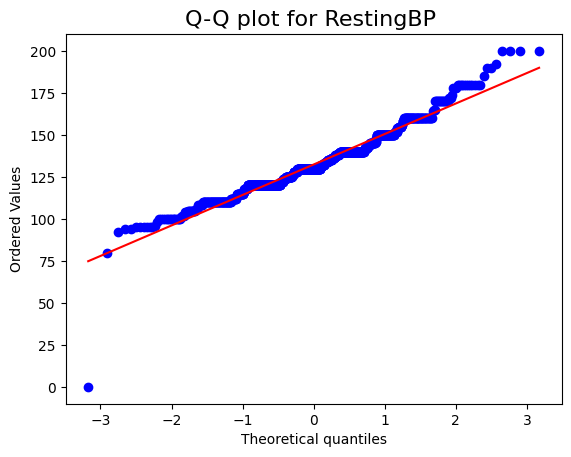

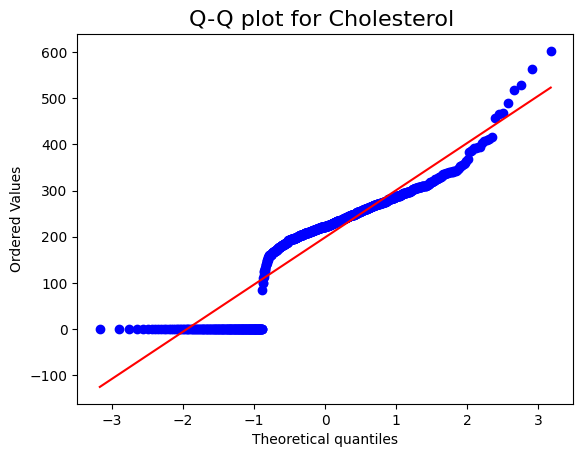

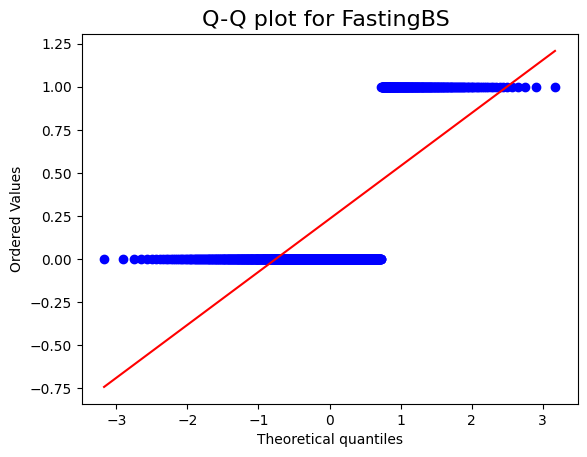

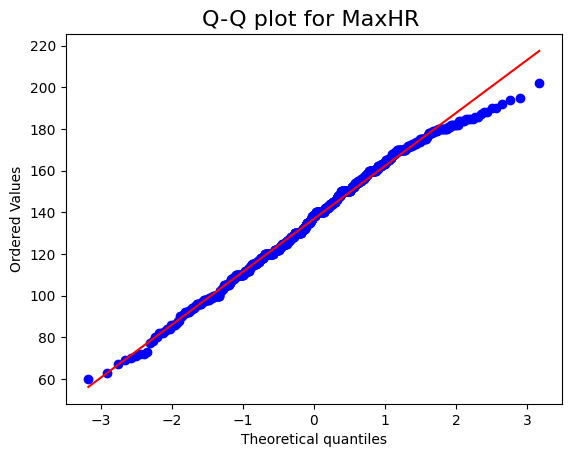

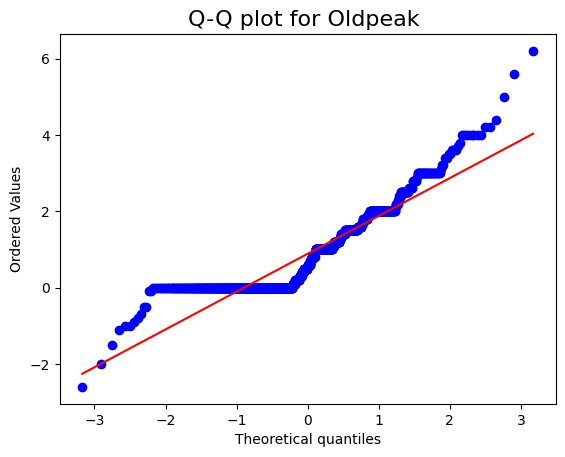

In [30]:
for i in numerical_data.columns:
  stats.probplot(df[i], dist="norm", plot=plt)
  plt.title(f"Q-Q plot for {i} " , fontsize = 16)
  plt.show()

<a id="feature-insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Feature Insights
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px;">
    <li><b>Age:</b> The variable "Age" is approximately normally distributed, though minor deviations in the tails might suggest a slight skewness.</li>
    <li><b>RestingBP (Resting Blood Pressure):</b> "RestingBP" does not follow a normal distribution. The deviations at the lower end suggest the presence of outliers or a floor effect.</li>
    <li><b>Cholesterol:</b> "Cholesterol" has a heavily skewed or non-normal distribution, possibly due to missing or zero values being encoded improperly.</li>
    <li><b>MaxHR (Maximum Heart Rate):</b> "MaxHR" is approximately normal, with minor outliers or skewness in the higher range.</li>
    <li><b>Oldpeak:</b> "Oldpeak" is non-normal, with a clear skewed distribution and potential floor effects (values near 0).</li>
    <li><b>FastingBS (Fasting Blood Sugar):</b> "FastingBS" clearly does not follow a normal distribution.</li>
</ul>

</div>


<a id="4.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Shapiro-Wild Test</div>


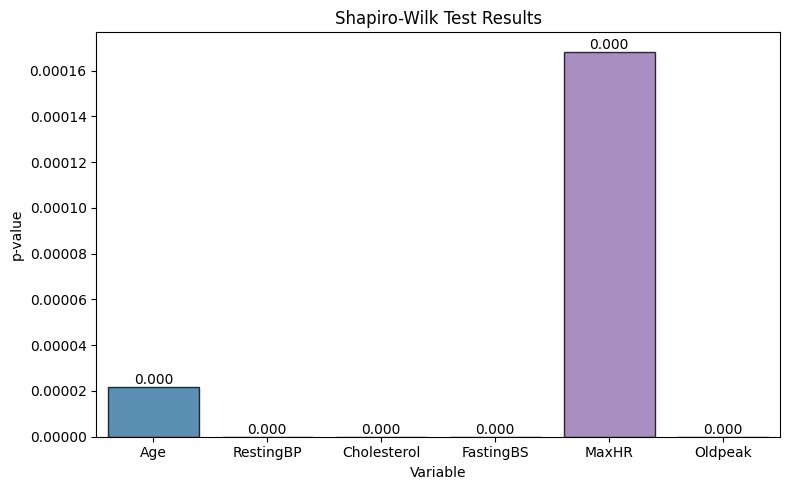

,Variable,Test Statistic,p-value
0,Age,0.991012,2.165168e-05
1,RestingBP,0.958043,1.494811e-15
2,Cholesterol,0.870595,6.976265e-27
3,FastingBS,0.523460,3.762033e-44
4,MaxHR,0.992672,1.683352e-04
5,Oldpeak,0.859879,8.271839e-28


In [31]:
shapiro_wilk_results = pd.DataFrame(columns=["Variable", "Test Statistic", "p-value"])
for feature in numerical_data.columns:
    data = df[feature]
    statistic, p_value = stats.shapiro(data)
    temp_df = pd.DataFrame({"Variable": [feature], "Test Statistic": [statistic], "p-value": [p_value]})
    shapiro_wilk_results = pd.concat([shapiro_wilk_results, temp_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 5))
barplot = sns.barplot(data=shapiro_wilk_results, x="Variable", y="p-value", edgecolor="black", alpha=0.8)
ax.set_xlabel("Variable")
ax.set_ylabel("p-value")
ax.set_title("Shapiro-Wilk Test Results")
for p in barplot.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f"{height:.3f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()
display(shapiro_wilk_results)


<a id="key-observations"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Key Observations: p-value Interpretation
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px;">
    <li><b>p-value Interpretation:</b>
        <ul style="list-style-type: square; padding-left: 20px;">
            <li>A p-value < 0.05 indicates that the null hypothesis (data is normally distributed) is rejected, meaning the variable does not follow a normal distribution.</li>
            <li>A p-value ≥ 0.05 suggests the variable may follow a normal distribution.</li>
        </ul>
    </li>
    <li><b>Age (p-value = 0.007):</b> The p-value is slightly below 0.05, so Age does not follow a perfect normal distribution.</li>
    <li><b>RestingBP (p-value ≈ 0):</b> The p-value is extremely low, indicating a strong departure from normality. Consider log transformation or normalization to handle the skewness.</li>
    <li><b>Cholesterol (p-value = 0.002):</b> The variable is not normally distributed.</li>
    <li><b>FastingBS (p-value ≈ 0):</b> This variable is binary, so a normality test isn’t meaningful here.</li>
    <li><b>MaxHR (p-value = 0.000035):</b> The variable is not normally distributed.</li>
    <li><b>Oldpeak (p-value ≈ 0):</b> The data strongly deviates from normality.</li>
</ul>

</div>


<a id="4.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Bi-Variate Analysis</div>


<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 How Continuous Variables Vary in Relation to the Target Variable
</div>

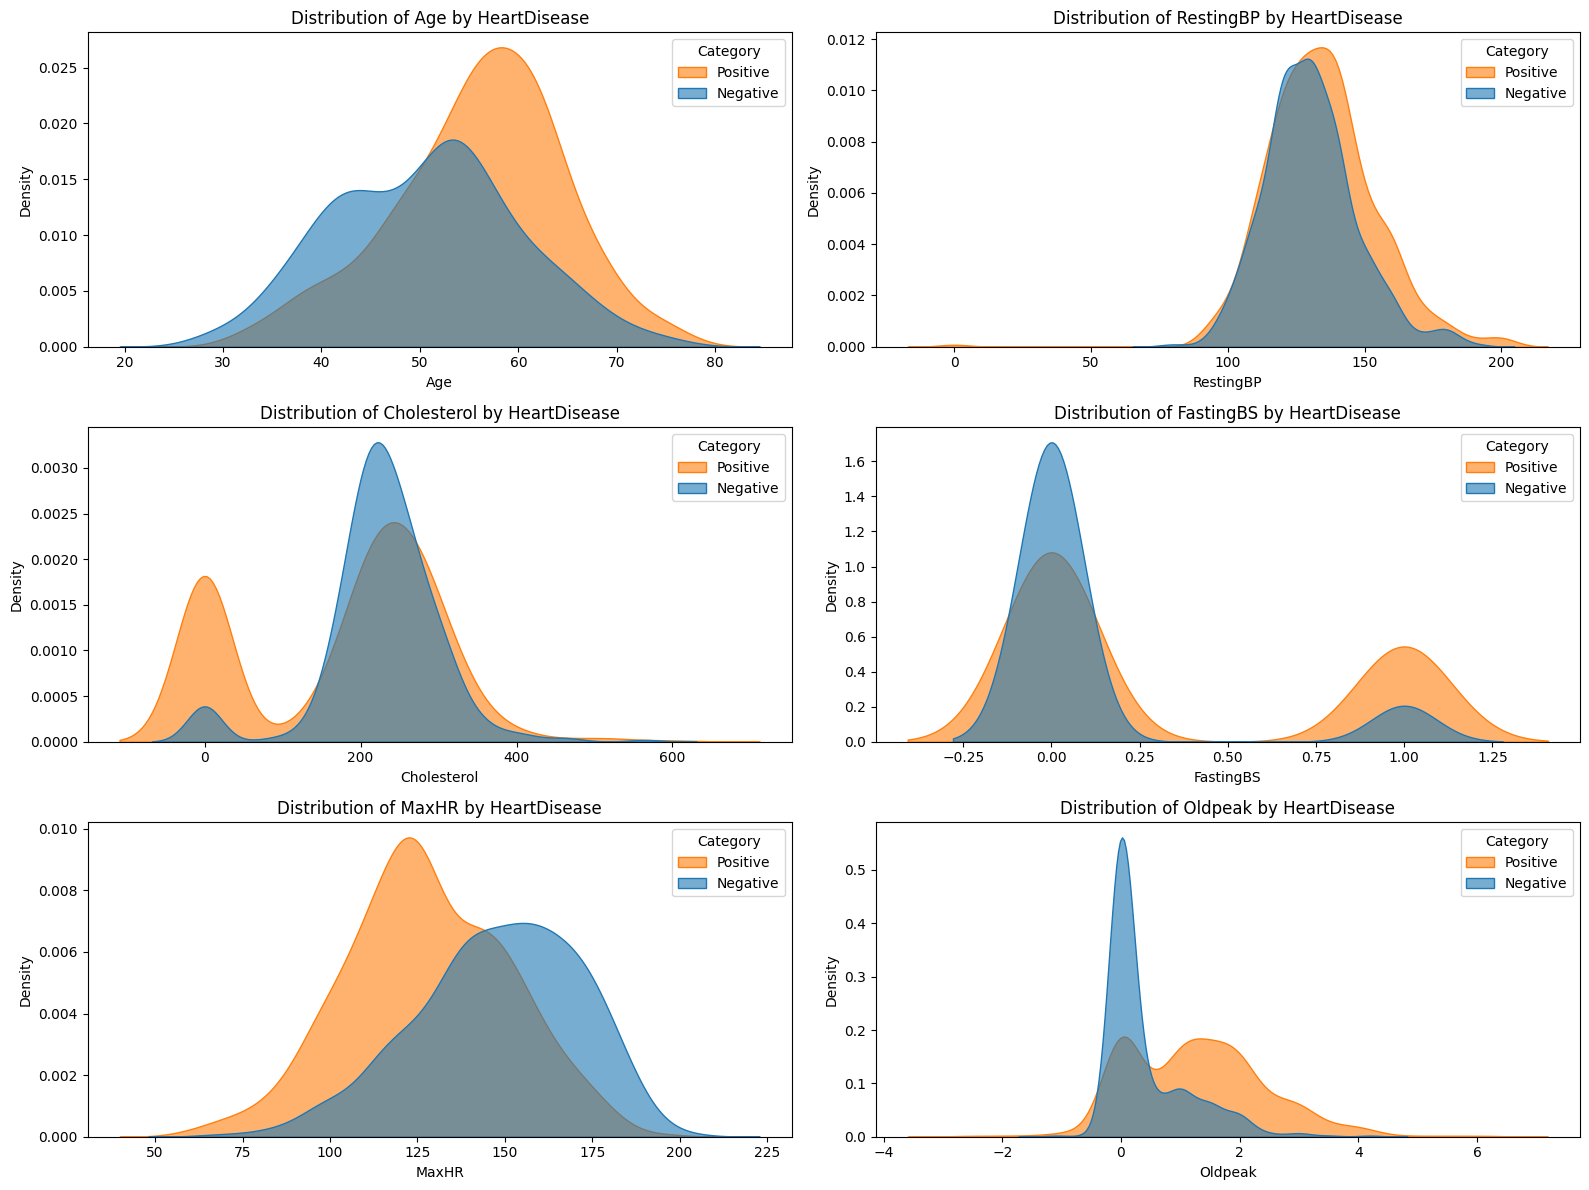

In [32]:
# Number of numerical columns
numerical_columns = numerical_data.columns.tolist()
num_cols = len(numerical_columns)

# Set the number of rows and columns for the subplots grid
rows = (num_cols // 2) + (num_cols % 2)  # 2 columns per row
cols = 2

# Create a figure for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through each numerical column and plot in a subplot
for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='HeartDisease', fill=True, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f"Distribution of {col} by HeartDisease")
    axes[idx].legend(title="Category", labels=['Positive', 'Negative'])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Density")

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.savefig('Looking feature Insights.png', dpi=300, bbox_inches='tight')  # Save as PNG

plt.tight_layout()
plt.show()

<a id="takeaways"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Key Takeaways
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px;">
    <li><b>The distributions for heart disease positive and negative groups overlap,</b> but the positive group peaks at a slightly higher age.</li>
    <li><b>Lower maximum heart rates</b> are associated with heart disease, suggesting it could be a strong predictor.</li>
    <li><b>Higher "Oldpeak" values</b> are strongly associated with heart disease, making it a potentially important feature.</li>
    <li><b>FastingBS shows a strong association with heart disease status,</b> as the distributions between the groups differ significantly. Individuals with higher fasting blood sugar (value = 1) are more likely to have heart disease.</li>
    <li><b>RestingBP shows overlap,</b> indicating limited predictive power alone but potential value in combination with other features.</li>
    <li><b>Cholesterol needs careful handling</b> due to the abundance of zero values.</li>
</ul>

</div>


<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 How mean of features relate with heart disease ??</div>

In [33]:
positive = df[df["HeartDisease"] == 1]
negative = df[df["HeartDisease"] == 0]

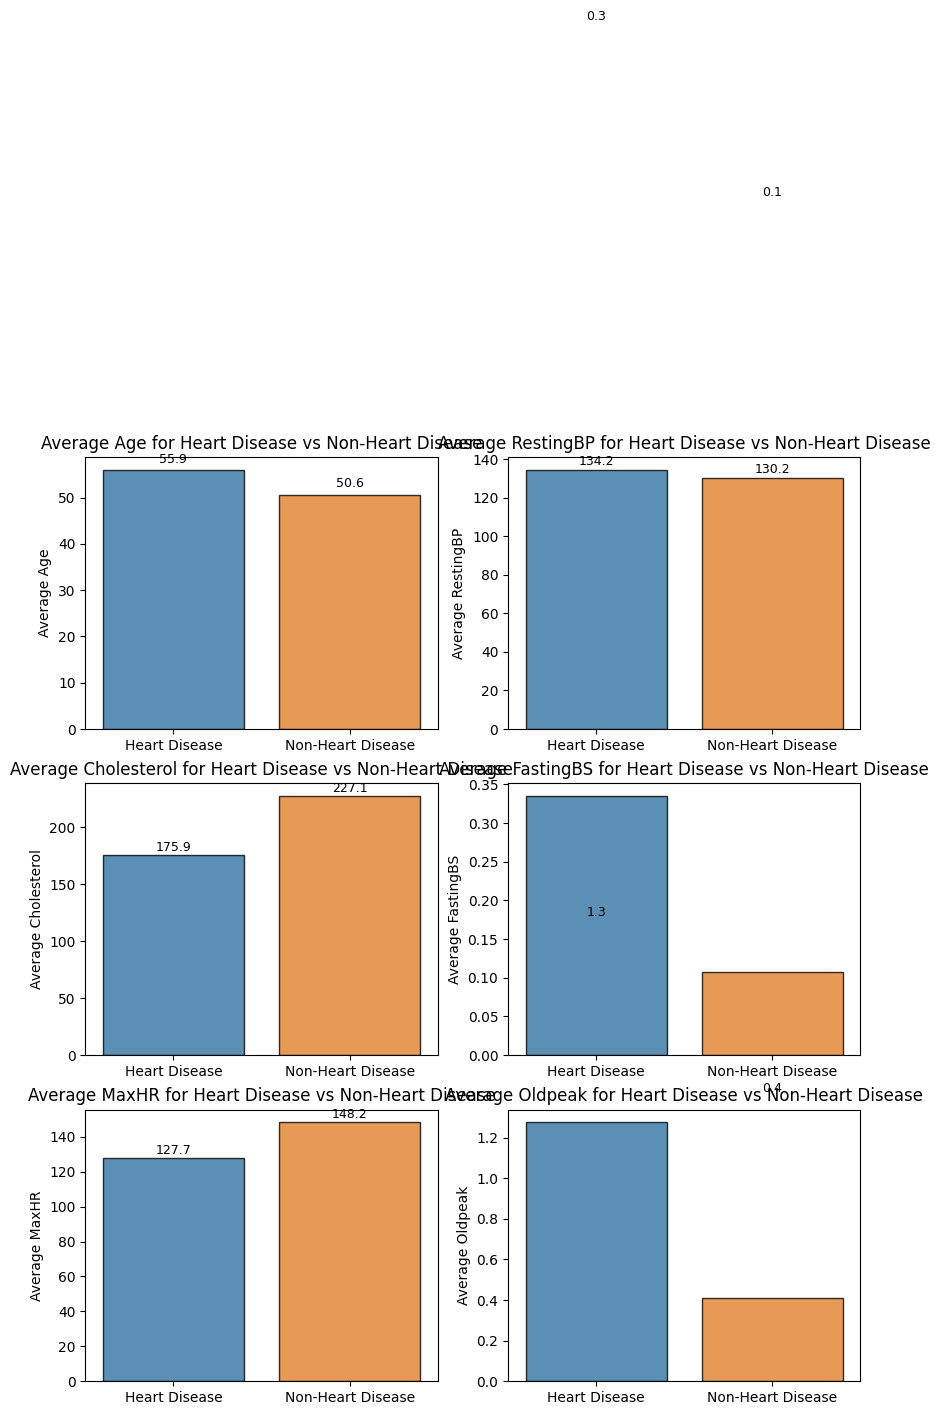

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Looping through each feature
for i, feature in enumerate(numerical_data):
    avg_heart_failure = positive[feature].mean()
    avg_non_heart_failure = negative[feature].mean()

    # Creating the bar chart for the current feature
    sns.barplot(
        x=["Heart Disease", "Non-Heart Disease"],
        y=[avg_heart_failure, avg_non_heart_failure],
        ax=axes[i],
        edgecolor="black",
        alpha=0.8,
    )
    axes[i].set_ylabel(f"Average {feature}")
    axes[i].set_title(f"Average {feature} for Heart Disease vs Non-Heart Disease")

    # Adding annotations above the bars
    axes[i].annotate(
        f"{avg_heart_failure:.1f}",
        xy=(0, avg_heart_failure),
        xytext=(0, avg_heart_failure + 1),
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )
    axes[i].annotate(
        f"{avg_non_heart_failure:.1f}",
        xy=(1, avg_non_heart_failure),
        xytext=(1, avg_non_heart_failure + 1),
        ha="center",
        va="bottom",
        fontsize=9,
        color="black",
    )

# Remove unused subplots if any
if len(numerical_data) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and spacing
plt.tight_layout()
plt.show()

<a id="5"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Feature Engineering And Scaling🧩</div>


<a id="5.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Feature-Scaling</div>


In [35]:
copy_df = df.copy(deep=True)
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
for i in numerical_data.columns.tolist() :
  min_max_scaler_df = min_max_scaler.fit_transform(copy_df[[i]])
  standard_scaler_df = standard_scaler.fit_transform(min_max_scaler_df)
  copy_df[i] = standard_scaler_df.flatten()

df= copy_df

In [36]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0


<a id="5.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Categorical Data Encoding</div>

In [37]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()

for i in categorical_data.columns.tolist():
  copy_df[i] = encoder.fit_transform(copy_df[i])

copy_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,-0.551341,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1.813758,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,-0.551341,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,-0.551341,0,1.461525,0,-0.832432,1,1


<a id="6"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Feature Importance Analysis Using Inferential Statistics🧩</div>

<a id="6.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">ANOVA</div>

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
import os
continuous_feature_names= numerical_data.columns.tolist()

In [39]:
selector = SelectKBest(score_func = f_classif , k='all')
fit = selector.fit(copy_df[numerical_data.columns.tolist()],copy_df['HeartDisease'])
anova_score = pd.DataFrame(data = fit.scores_ , index = numerical_data.columns.tolist() , columns = ['F-value'])
anova_score['p-value'] = fit.pvalues_
anova_score['significant'] = anova_score['p-value'] < 0.05
anova_score = anova_score.sort_values(by = 'F-value', ascending = False)
anova_score

,F-value,p-value,significant
Oldpeak,178.615120,2.390772e-37,True
MaxHR,174.913585,1.137786e-36,True
Age,79.160779,3.007953e-18,True
FastingBS,70.478543,1.753598e-16,True
Cholesterol,52.459725,9.308309e-13,True
RestingBP,10.727228,1.095315e-03,True


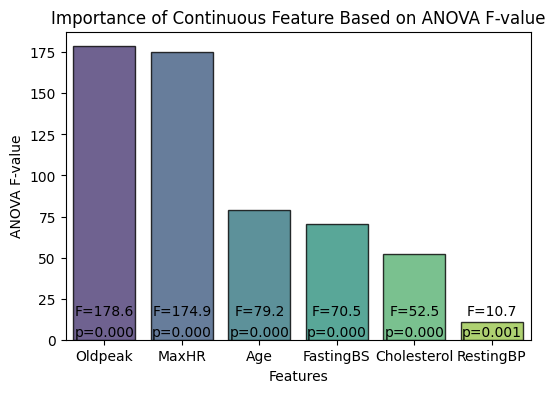

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
barplot = sns.barplot(x=anova_score.index, y=anova_score["F-value"], palette="viridis", edgecolor="black", alpha=0.8)
ax.set_title("Importance of Continuous Feature Based on ANOVA F-value")
ax.set_xlabel("Features")
ax.set_ylabel('ANOVA F-value')

for i, (p_value, f_value) in enumerate(zip(anova_score['p-value'], anova_score["F-value"])):
    barplot.text(i, 15, f'F={f_value:.1f}', color='black', ha='center')
    barplot.text(i, 2, f'p={p_value:.3f}', color='black', ha='center')
os.makedirs("visualizations", exist_ok=True)
plt.savefig(os.path.join("visualizations", "ANOVA_results.png"), dpi=300)
plt.show()

<a id="insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Insights
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px;">
    <li><b>All Continuous Variables</b> have a significant effect on the target variable.</li>
</ul>

</div>


<a id="6.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Chi-Squared Test</div>

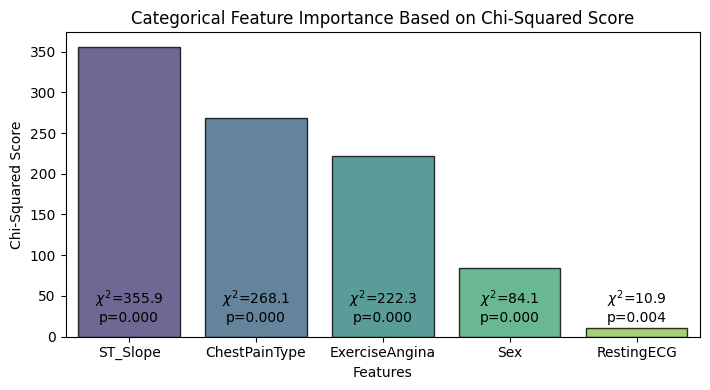

,Chi-Squared Score,p-value,Degrees of Freedom,significant
ST_Slope,355.918443,0.0,2,True
ChestPainType,268.067239,0.0,3,True
ExerciseAngina,222.259383,0.0,1,True
Sex,84.145101,0.0,1,True
RestingECG,10.931469,0.004229,2,True


In [41]:
categorical_feature_names= categorical_data.columns.tolist()
chisquare_scores = pd.DataFrame(index=categorical_data.columns.tolist(), columns=["Chi-Squared Score", "p-value", "Degrees of Freedom"])
for feature in categorical_feature_names:
    contingency_table = pd.crosstab(df[feature], df["HeartDisease"])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)

    chisquare_scores.loc[feature, "Chi-Squared Score"] = chi2
    chisquare_scores.loc[feature, "p-value"] = p
    chisquare_scores.loc[feature, "Degrees of Freedom"] = dof

chisquare_scores["significant"] = chisquare_scores["p-value"] < 0.05
chisquare_scores = chisquare_scores.sort_values(by="Chi-Squared Score", ascending=False)



fig, ax = plt.subplots(1, 1, figsize=(7.2, 4))
barplot = sns.barplot(x=chisquare_scores.index, y=chisquare_scores["Chi-Squared Score"], palette="viridis", ax=ax, edgecolor="black", alpha=0.8)
ax.set_title("Categorical Feature Importance Based on Chi-Squared Score")
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Squared Score")

# Annotate each bar with its Chi-Squared score and p-value
for i, (p_value, chi2_score) in enumerate(zip(chisquare_scores["p-value"], chisquare_scores["Chi-Squared Score"])):
    chi2_str = f'$\chi^2$={chi2_score:.1f}'  # Chi-squared symbol with exponent using LaTeX
    barplot.text(i, 40, chi2_str, color="black", ha="center")
    barplot.text(i, 18, f"p={p_value:.3f}", color="black", ha="center")

plt.tight_layout()
plt.savefig(os.path.join("visualizations", "chi_sq_results.png"), dpi=300)
plt.show()

chisquare_scores

<a id="chi_squared_takeaways"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 Chi-Squared Test Takeaways
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px;">
    <li><b>All categorical variables</b> have a significant effect on the target variable.</li>
    <li><b>Resting ECG</b> has a p-value that is not much below 0.05, suggesting it could be removed from the model despite being statistically significant. If I were to remove any feature, this would be the best candidate.</li>
</ul>

</div>


<a id="7"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Building🧩</div>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , f1_score, recall_score ,classification_report, confusion_matrix

In [43]:
X= copy_df.drop('HeartDisease',axis=1)
y= copy_df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [44]:
def result(y_true , y_pred , models_df , name):
  cm = confusion_matrix(y_true, y_pred )
  TP = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

  ans = pd.DataFrame({"experiment_name": [name], "predictions": [y_pred.tolist()], "accuracy": [accuracy],
         "precision": [precision], "recall": [recall], "f1": [f1], "specificity": [specificity],
                                                    "confusion_matrix": [cm]})
  return ans;

In [45]:
def make_confusion_matrix(y_true, y_pred, labels=None, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix of {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [46]:
models_df = pd.DataFrame({"experiment_name": [], "predictions": [], "accuracy": [], "precision": [], "recall": [], "f1": [], "specificity": [], "confusion_matrix": []})
models_df["predictions"] = models_df["predictions"].astype(object)  # this line is needed to enable numpy arrays to enter the "predictions" column
models_df["confusion_matrix"] = models_df["confusion_matrix"].astype(object)  # this line is needed to enable numpy arrays to enter the "predictions" column
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix


<a id="7.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Model Building Using 7 Models</div>

In [47]:
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.linear_model import LogisticRegression , LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [48]:
lr=LogisticRegression()
rf=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [49]:
def train_models( models, x_train, y_train):
    models_df = pd.DataFrame({"experiment_name": [], "predictions": [], "accuracy": [], "precision": [], "recall": [], "f1": [], "specificity": [], "confusion_matrix": []})
    for name, model in models.items():
        print()
        print(f"Training {name}...")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print(f"{name} training done.")
        models_df = pd.concat([models_df , result(y_test , y_pred , models_df , name) ] , ignore_index=True)

    return models_df


In [50]:
models = {
    'Logistic Regression': lr ,
    'Random Forest': rf,
    'Support Vector Machine': svc,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'Gradient Boosting': gb,
    'XGBoost': xgb
}
models_df = pd.concat([models_df , train_models(models ,x_train , y_train ) ] , ignore_index=True)


Training Logistic Regression...
Logistic Regression training done.

Training Random Forest...
Random Forest training done.

Training Support Vector Machine...
Support Vector Machine training done.

Training K-Nearest Neighbors...
K-Nearest Neighbors training done.

Training Naive Bayes...
Naive Bayes training done.

Training Decision Tree...
Decision Tree training done.

Training Gradient Boosting...
Gradient Boosting training done.

Training XGBoost...
XGBoost training done.


In [51]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


In [52]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"


<a id="7.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Model Building by dealing Missings</div>

<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊  Trying to improve models by dealing with missing cholesterol values </div>

In [53]:
df['Cholesterol'].describe()

count    9.180000e+02
mean    -2.786442e-16
std      1.000545e+00
min     -1.818435e+00
25%     -2.337038e-01
50%      2.213632e-01
75%      6.238346e-01
max      3.697252e+00
Name: Cholesterol, dtype: float64

In [54]:
df[df['Cholesterol'] != 0]['Cholesterol'].describe()

count    9.180000e+02
mean    -2.786442e-16
std      1.000545e+00
min     -1.818435e+00
25%     -2.337038e-01
50%      2.213632e-01
75%      6.238346e-01
max      3.697252e+00
Name: Cholesterol, dtype: float64

In [55]:
mean_imputed_df = df.copy(deep=True)
mean_imputed_df['FastingBS']=df['FastingBS'].astype(int)
mean_imputed_df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())
mean_imputed_df['Cholesterol'].describe()

count    9.180000e+02
mean    -2.786442e-16
std      1.000545e+00
min     -1.818435e+00
25%     -2.337038e-01
50%      2.213632e-01
75%      6.238346e-01
max      3.697252e+00
Name: Cholesterol, dtype: float64

In [56]:
im_lr=LogisticRegression()
im_rf=RandomForestClassifier()
im_svc=SVC()
im_knn=KNeighborsClassifier()
im_nb=GaussianNB()
im_dt=DecisionTreeClassifier()
im_gb=GradientBoostingClassifier()
im_xgb=XGBClassifier()

In [57]:
models = {
    'Imputed Logistic Regression': im_lr ,
    'Imputed Random Forest': im_rf,
    'Imputed Support Vector Machine': im_svc,
    'Imputed K-Nearest Neighbors': im_knn,
    'Imputed Naive Bayes': im_nb,
    'Imputed Decision Tree': im_dt,
    'Imputed Gradient Boosting': im_gb,
    'Imputed XGBoost': im_xgb
}


In [58]:
X= mean_imputed_df.drop('HeartDisease',axis=1)
y= mean_imputed_df['HeartDisease']
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [59]:
models_df = pd.concat([models_df , train_models(models ,x_train , y_train ) ] , ignore_index=True)


Training Imputed Logistic Regression...
Imputed Logistic Regression training done.

Training Imputed Random Forest...
Imputed Random Forest training done.

Training Imputed Support Vector Machine...
Imputed Support Vector Machine training done.

Training Imputed K-Nearest Neighbors...
Imputed K-Nearest Neighbors training done.

Training Imputed Naive Bayes...
Imputed Naive Bayes training done.

Training Imputed Decision Tree...
Imputed Decision Tree training done.

Training Imputed Gradient Boosting...
Imputed Gradient Boosting training done.

Training Imputed XGBoost...
Imputed XGBoost training done.


In [60]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


<a id="8"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩HyperParameter Tunning🧩</div>

<a id="8.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For Decision Tree</div>

In [61]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 50]
}

In [62]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),param_grid=param_grid,
                           scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [63]:
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)
predictions = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
models_df = pd.concat([models_df , train_models({'Tunned DecisionTree': best_dt_model} ,x_train , y_train ) ] , ignore_index=True)
# models_df = pd.concat([models_df , train_models(best_dt_model ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

Training Tunned DecisionTree...
Tunned DecisionTree training done.
Accuracy: 0.8478260869565217


In [64]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


<a id="8.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For Random Forest</div>

In [65]:
random_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [66]:
rf_grid_search = GridSearchCV( estimator=best_dt_model,param_grid=param_grid,
                           scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Accuracy: 0.8419345820519988


In [67]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Tunned Random Forest": best_rf} ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Tunned Random Forest...
Tunned Random Forest training done.
Accuracy: 0.8695652173913043


In [68]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


<a id="8.3"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For XGBoost</div>

In [69]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 1],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'lambda': [0, 1, 10],
    'alpha': [0, 0.1, 1, 10]
}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
xgb_random_search = RandomizedSearchCV( estimator=xgb, param_distributions=param_grid, n_iter=50,
    scoring='accuracy', cv=5, verbose=2,random_state=42, n_jobs=-1)
xgb_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END alpha=10, gamma=0.3, lambda=1, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END alpha=0.1, gamma=0, lambda=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END alpha=0, gamma=0, lambda=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END alpha=0, gamma=0, lambda=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END alpha=10, gamma=0.2, lambda=10, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=10, gamma=0.2, lambda=10, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END alpha=1, gamma=1, lambda=1, learning_rate=0.1, max_depth=7, min_ch

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 1, 10],
                                        'gamma': [0, 0.1, 0.2, 0.3, 1],
                                        'lambda': [0, 1, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [72]:
best_xgb = xgb_random_search.best_estimator_
y_pred = best_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Tunned XG Boost": best_xgb} ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Tunned XG Boost...
Tunned XG Boost training done.
Accuracy: 0.8804347826086957


In [73]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


<a id="9"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Building (Using BAGGING)🧩</div>

<a id="9.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white ; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For SVM</div>

In [74]:
from sklearn.ensemble import BaggingClassifier

In [75]:
bg_svm = BaggingClassifier(estimator=svc, n_estimators=100, random_state=42)
bg_svm.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [76]:
y_pred = bg_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"SVC(bagging)": bg_svm} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "SVC Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training SVC(bagging)...
SVC(bagging) training done.
Accuracy: 0.8913043478260869


In [77]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


<a id="9.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For KNN</div>

In [78]:
bg_knn = BaggingClassifier(estimator=knn, n_estimators=100, random_state=42)
bg_knn.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [79]:
y_pred = bg_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"KNN (bagging)": bg_knn} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "KNN Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training KNN (bagging)...
KNN (bagging) training done.
Accuracy: 0.8586956521739131


In [80]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


In [81]:
bg_lr = BaggingClassifier(estimator=lr, n_estimators=100, random_state=42)
bg_lr.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

In [82]:
y_pred = bg_lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Logistic Regression (bagging)": bg_svm} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "Logistic Regresion Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Logistic Regression (bagging)...
Logistic Regression (bagging) training done.
Accuracy: 0.9021739130434783


<a id="10"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Evaluation🧩</div>

In [83]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
19,SVC(bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
15,Imputed XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
12,Imputed Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
10,Imputed Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
21,Logistic Regression (bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


In [84]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.766304,0.860215,0.727273,0.788177,0.824324,"[[61, 13], [30, 80]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"


In [85]:
models_df.to_csv("Trained_model_metrics.csv", index=False)

In [86]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
19,SVC(bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
15,Imputed XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
12,Imputed Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
10,Imputed Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
21,Logistic Regression (bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 Finding the best model so far according to each metrics </div>

In [87]:
metrics_col = models_df.columns.to_list()[2:-1]
metrics_col

['accuracy', 'precision', 'recall', 'f1', 'specificity']

In [88]:
for metric in metrics_col:
    print(f"Top 3 models by {metric}")
    display(models_df.drop("predictions", axis=1).sort_values(by=metric, ascending=False).head(3))
    print("-"*50)

Top 3 models by accuracy


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by precision


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by recall


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by f1


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by specificity


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------


In [89]:
models_df.drop("predictions", axis=1).sort_values(by="accuracy", ascending=False).to_csv("model_metrics.csv", index=False)

<a id="11"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Submission🧩</div>

In [90]:
import joblib
import os

In [91]:
save_dir = 'saved_models'
os.makedirs(save_dir, exist_ok=True)
joblib.dump(lr, os.path.join(save_dir, 'Logistic Regression'))
joblib.dump(rf, os.path.join(save_dir, 'Random Forest'))
joblib.dump(svc, os.path.join(save_dir, 'Support Vector Machine'))

['saved_models/Support Vector Machine']

<a id="12"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩AUTHOR'S NOTE🧩</div>

<div style="background-color:white;font-size:16px;font-family:Verdana;border-style: solid;border-color: #563A9C;border-width:4px;padding:10px;margin: 1px;color:black ;overflow:hidden"> 

💡 Thank you for exploring this notebook! 💬 I would love to hear your thoughts! 🙌 If you found this notebook helpful, feel free to leave a comment or share your feedback! 🚀 I'm open to suggestions, improvements, or any insights you have on how we can take this analysis further.

🙌 Your feedback is highly appreciated!</strong> If you have any thoughts, questions, or comments about this analysis, don’t hesitate to drop them below! Your feedback helps me improve future projects and provides valuable insights to the community. Please feel free to upvote if you enjoyed this notebook! 

👍. It means a lot and helps the Kaggle community discover valuable content like this!

Let’s continue learning and building amazing projects together. Happy Kaggling!
    
<hr>
    
<center> <strong> If you liked this Notebook, please do upvote. </str
    <br>    
<center> <strong style = 'color: red;' > ✨Best Wishes✨ </strong>